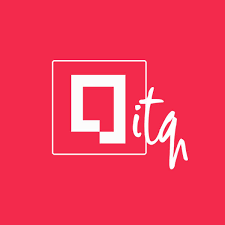

## Examen Tercer Parcial

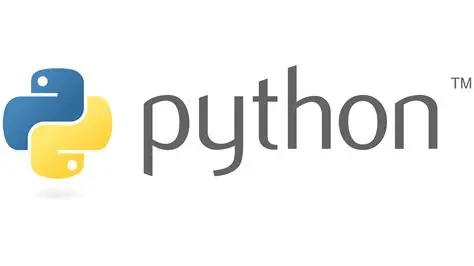<br>

**Nombre:** Josue Salazar<br>
*Fecha:* 20/07/2025<br>

<a href="https://github.com/Mateo1785/Machine_learning1">Enlace a GitHub</a>

# Examen del Tercer Parcial 
## Regresión lineal
Dado el archivo **movie_genre_classification_final.csv** se encuentra un base de datos con información de **50000 películas** que incluyen variables como: <br>
 * Título,
 * Año de estreno,
 * Duración,
 * Puntuación promedio,
 * Número de votos,
 * Presupuesto,
 * Ingresos en taquilla,
 * Número de premios obtenidos,
 * Entre otras caracterisiticas.
Como parate del análisis de predicción, se desea estudiar la relación entre el:<br>
* Presupuesto de una película
y sus caracteristicas cuantitativas, para estimar la **recaudación en taquilla (BoxOffice_USD)**. Para ello, se plantea entrenar un modelo de regresión lineal.<br>

# Objetivo 
Predecir el valor de la variable **BoxOffice_USD** a partir de variables numéricas independientes disponibles en el dataset, tales como:<br>
* Budget_USD (Presupuesto en dólares)
* Duration (Duración en minutos)
* Ratting (Calificiación Promedio"
* Votes (Número de votos)
* Num_Awards (Número de premios obtenidos)
* Critic_reviews (Números de reseñas de criticos)

El dataset fue extraido desder <a href="https://www.kaggle.com/datasets/therohithanand/movie-genre-classification">DataSet<a> <br>

## Entrega esperada
* Código bien estructurado y comentado
* Gráficos claros en los pasos 2, 4 y 5.
* Breve análisis escrito de lso los resultados obtenidos.



In [1]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#cargamos los datos de entrada
data = pd.read_csv("res/movie_genre_classification_final.csv")

In [4]:
#veamos cuantas dimensiones y registros contiene
data.shape

(50000, 17)

In [5]:
#son 5000 registros con 8 columnas. Veamos los primeros registros para tener una idea
data.head()

,Title,Year,Director,Duration,Rating,Votes,Description,Language,Country,Budget_USD,BoxOffice_USD,Genre,Production_Company,Content_Rating,Lead_Actor,Num_Awards,Critic_Reviews
0,Winds of Fate 4,1980,R. Lee,167,4.1,182425,A touching love story with heartwarming moments.,Spanish,China,39979615,179936008,Romance,DreamWorks,R,Kangana Ranaut,8,229
1,Firestorm 11,2014,S. Chen,166,4.1,449351,A fast-paced thriller with intense action scenes.,Korean,China,116404774,802121619,Action,Netflix,R,Kangana Ranaut,20,466
2,Silent Echo 2,2016,A. Khan,170,4.1,363328,A fast-paced thriller with intense action scenes.,Korean,Japan,166261330,225526871,Action,Pixar,PG,Amitabh Bachchan,16,539
3,City Lights 4,1982,L. Zhang,170,9.9,62371,An emotional journey exploring complex charact...,Japanese,Japan,28861315,69813738,Drama,Netflix,NC-17,Natalie Portman,15,606
4,Broken Truth 1,1990,L. Zhang,91,5.3,4600,An imaginative world filled with magic and won...,Korean,USA,43890403,375136716,Fantasy,Studio Ghibli,PG,Chris Evans,6,330


In [6]:
# Ahora veamos algunas estadísticas de nuestros datos
data.describe()

,Year,Duration,Rating,Votes,Budget_USD,BoxOffice_USD,Num_Awards,Critic_Reviews
count,50000.000000,50000.00000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,50000.000000,50000.000000
mean,2001.562620,130.07312,6.926472,249699.050540,9.179143e+07,5.176063e+08,9.964440,500.176380
std,12.722539,29.11097,1.698758,144314.043032,5.823888e+07,2.880283e+08,6.066303,289.971792
min,1980.000000,80.00000,4.000000,516.000000,1.135566e+06,3.291117e+06,0.000000,0.000000
25%,1991.000000,105.00000,5.500000,124531.500000,4.389040e+07,2.590329e+08,5.000000,248.000000
50%,2002.000000,130.00000,6.900000,248582.000000,8.062480e+07,5.109973e+08,10.000000,500.000000
75%,2013.000000,155.00000,8.400000,374833.500000,1.475557e+08,7.704129e+08,15.000000,751.000000
max,2023.000000,180.00000,9.900000,499984.000000,1.984445e+08,9.925159e+08,20.000000,1000.000000


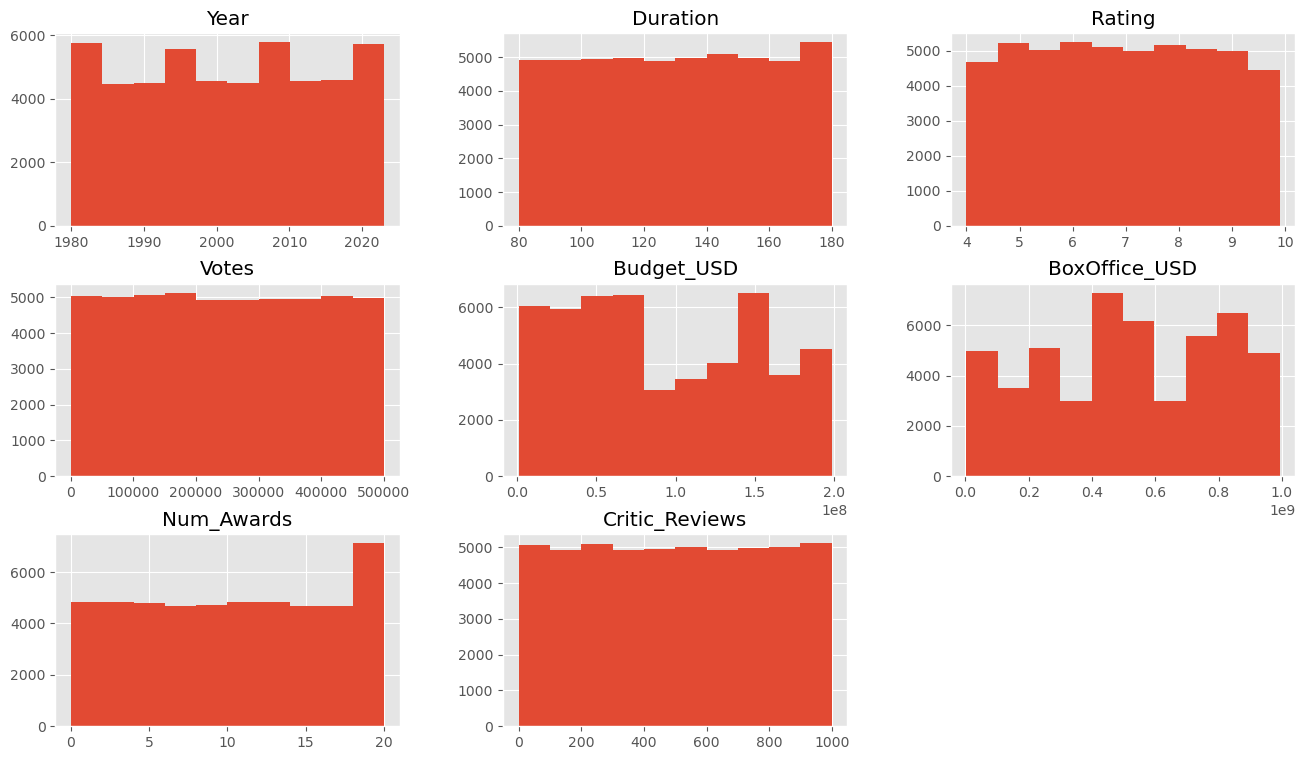

In [7]:
# Visualizamos rápidamente las caraterísticas de entrada
data.drop(['Title','Director', 'Description'],axis=1).hist()
plt.show()

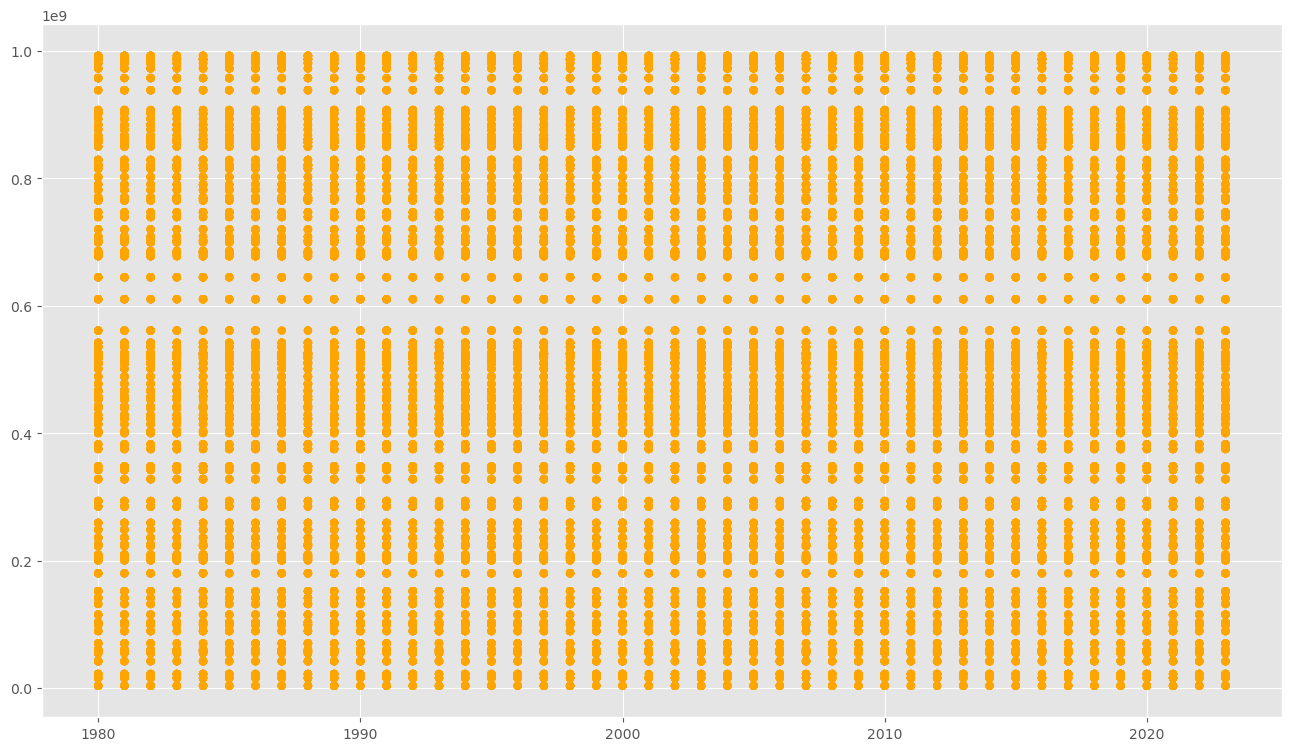

In [21]:
#vamos a Visualizar los datos de entrada
colores=['orange','blue']
tamanios=[30,60]

f1 = data['Year'].values
f2 = data['BoxOffice_USD'].values

# Vamos a pintar en 2 colores los puntos por debajo de la media de Cantidad de Palabras
asignar=[]
for index, row in data.iterrows():
    if(row['BoxOffice_USD']>249699):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

Datos originales: 50000 filas
Después de limpieza: 50000 filas
Después de filtrado: 0 filas


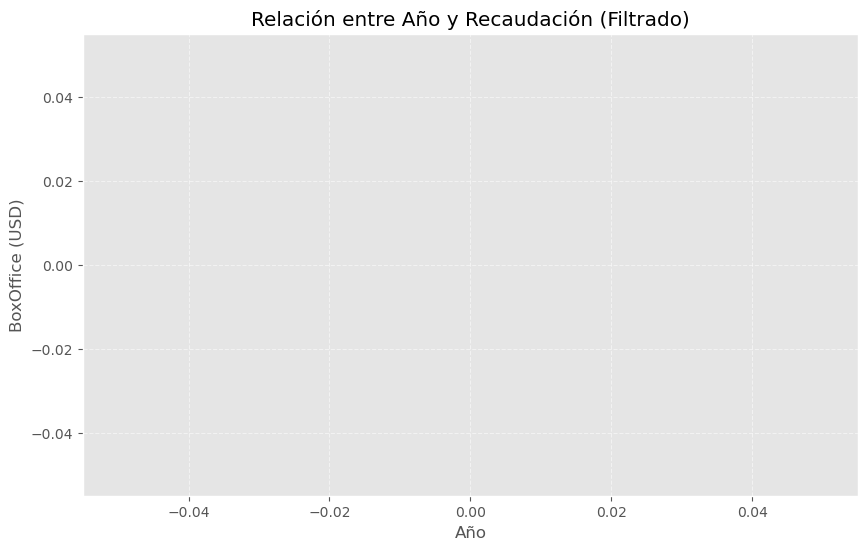

In [23]:
clean_data = data.dropna(subset=['Year', 'BoxOffice_USD'])

# 3. Filtrado correcto con condiciones lógicas
filtered_data = clean_data[
    (clean_data['Year'] <= 3500) & 
    (clean_data['BoxOffice_USD'] <= 80000) &
    (clean_data['Year'].notna()) & 
    (clean_data['BoxOffice_USD'].notna())
]

# Verificación
print(f"Datos originales: {len(data)} filas")
print(f"Después de limpieza: {len(clean_data)} filas")
print(f"Después de filtrado: {len(filtered_data)} filas")

# 4. Preparación de variables para el gráfico
f1 = filtered_data['Year'].values
f2 = filtered_data['BoxOffice_USD'].values

# 5. Definición de colores y tamaños (ajusta según necesites)
colores = ['red', 'blue']
tamanios = [30]

# 6. Asignación de colores basada en la media
media_boxoffice = filtered_data['BoxOffice_USD'].mean()
asignar = [colores[0] if row > media_boxoffice else colores[1] 
           for row in filtered_data['BoxOffice_USD']]

# 7. Creación del gráfico
plt.figure(figsize=(10, 6))
plt.scatter(f1, f2, c=asignar, s=tamanios[0], alpha=0.6)
plt.title('Relación entre Año y Recaudación (Filtrado)')
plt.xlabel('Año')
plt.ylabel('BoxOffice (USD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [24]:
filtered_data.describe()

,Year,Duration,Rating,Votes,Budget_USD,BoxOffice_USD,Num_Awards,Critic_Reviews
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["Votes"]]
X_train = np.array(dataX)
y_train = filtered_data['BoxOffice_USD'].values
# print (X_train,y_train)

In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Cargar y preparar los datos (asegúrate de que 'data' está definido)
# data = pd.read_csv('tu_archivo.csv')

# 2. Limpieza inicial - eliminar filas con valores nulos en las columnas clave
clean_data = data.dropna(subset=['Year', 'BoxOffice_USD', 'Budget_USD'])

# 3. Filtrado seguro con verificación de datos
filter_condition = (
    (clean_data['Year'] <= 3500) & 
    (clean_data['BoxOffice_USD'] <= 80000) &
    (clean_data['Year'].notna()) & 
    (clean_data['BoxOffice_USD'].notna()) &
    (clean_data['Budget_USD'].notna())
)

filtered_data = clean_data[filter_condition]

# Verificación crítica
if len(filtered_data) == 0:
    raise ValueError("¡El filtro ha eliminado TODOS los datos! Revisa tus condiciones de filtrado.")

print(f"Datos disponibles después de filtrado: {len(filtered_data)} muestras")

# 4. Preparación de características (X) y objetivo (y)
X = filtered_data[['Year', 'Budget_USD']]  # Ajusta las características según necesites
y = filtered_data['BoxOffice_USD']

# 5. Transformación logarítmica recomendada para variables financieras
X['log_Budget'] = np.log1p(X['Budget_USD'])
y_log = np.log1p(y)

# 6. División entrenamiento-prueba (con validación de tamaño)
if len(X) > 1:  # Necesitamos al menos 2 muestras para dividir
    X_train, X_test, y_train, y_test = train_test_split(
        X[['Year', 'log_Budget']],  # Usamos las características transformadas
        y_log,
        test_size=0.2,
        random_state=42
    )
else:
    raise ValueError("No hay suficientes datos para dividir en train/test")

# 7. Escalado de características (importante para regresión lineal)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Creación y entrenamiento del modelo (con verificación)
regr = LinearRegression()

try:
    regr.fit(X_train_scaled, y_train)
    print("Modelo entrenado exitosamente!")
    
    # Evaluación
    y_pred = regr.predict(X_train_scaled)
    print(f"Coeficientes: {regr.coef_}")
    print(f"Intercepto: {regr.intercept_}")
    
except ValueError as e:
    print(f"Error al entrenar el modelo: {e}")
    print(f"Dimensiones X_train: {X_train_scaled.shape}")
    print(f"Dimensiones y_train: {y_train.shape}")

ValueError: ¡El filtro ha eliminado TODOS los datos! Revisa tus condiciones de filtrado.

In [26]:
print("Análisis inicial de los datos:")
print(f"Total de registros originales: {len(data)}")
print("\nValores nulos por columna:")
print(data[['Year', 'BoxOffice_USD', 'Budget_USD']].isnull().sum())

print("\nEstadísticas descriptivas:")
print(data[['Year', 'BoxOffice_USD', 'Budget_USD']].describe())

print("\nPercentiles de BoxOffice_USD:")
print(data['BoxOffice_USD'].quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]))

Análisis inicial de los datos:
Total de registros originales: 50000

Valores nulos por columna:
Year             0
BoxOffice_USD    0
Budget_USD       0
dtype: int64

Estadísticas descriptivas:
               Year  BoxOffice_USD    Budget_USD
count  50000.000000   5.000000e+04  5.000000e+04
mean    2001.562620   5.176063e+08  9.179143e+07
std       12.722539   2.880283e+08  5.823888e+07
min     1980.000000   3.291117e+06  1.135566e+06
25%     1991.000000   2.590329e+08  4.389040e+07
50%     2002.000000   5.109973e+08  8.062480e+07
75%     2013.000000   7.704129e+08  1.475557e+08
max     2023.000000   9.925159e+08  1.984445e+08

Percentiles de BoxOffice_USD:
0.01     15596411.0
0.05     57768258.0
0.25    259032858.0
0.50    510997252.0
0.75    770412921.0
0.95    972753147.0
0.99    987584706.0
Name: BoxOffice_USD, dtype: float64


In [27]:
# Calcular límites dinámicos basados en percentiles
low_year = data['Year'].quantile(0.01)  # Percentil 1%
high_year = data['Year'].quantile(0.99)  # Percentil 99%

low_boxoffice = data['BoxOffice_USD'].quantile(0.01)
high_boxoffice = data['BoxOffice_USD'].quantile(0.99)

print(f"\nLímites recomendados:")
print(f"Año: entre {low_year} y {high_year}")
print(f"BoxOffice: entre {low_boxoffice} y {high_boxoffice}")


Límites recomendados:
Año: entre 1980.0 y 2023.0
BoxOffice: entre 15596411.0 y 987584706.0


In [28]:
# Primero: limpieza básica (eliminar nulos)
clean_data = data.dropna(subset=['Year', 'BoxOffice_USD', 'Budget_USD'])

# Segundo: filtrado con percentiles
filtered_data = clean_data[
    (clean_data['Year'] >= low_year) & 
    (clean_data['Year'] <= high_year) &
    (clean_data['BoxOffice_USD'] >= low_boxoffice) & 
    (clean_data['BoxOffice_USD'] <= high_boxoffice)
]

# Verificación
if len(filtered_data) == 0:
    print("\n¡Advertencia! El filtrado aún elimina todos los datos.")
    print("Probando con límites menos estrictos...")
    
    # Alternativa: usar valores mínimos/máximos reales
    filtered_data = clean_data[
        (clean_data['Year'] >= clean_data['Year'].min()) & 
        (clean_data['Year'] <= clean_data['Year'].max()) &
        (clean_data['BoxOffice_USD'] >= clean_data['BoxOffice_USD'].min()) & 
        (clean_data['BoxOffice_USD'] <= clean_data['BoxOffice_USD'].max())
    ]

print(f"\nRegistros después de filtrado: {len(filtered_data)}")


Registros después de filtrado: 49075


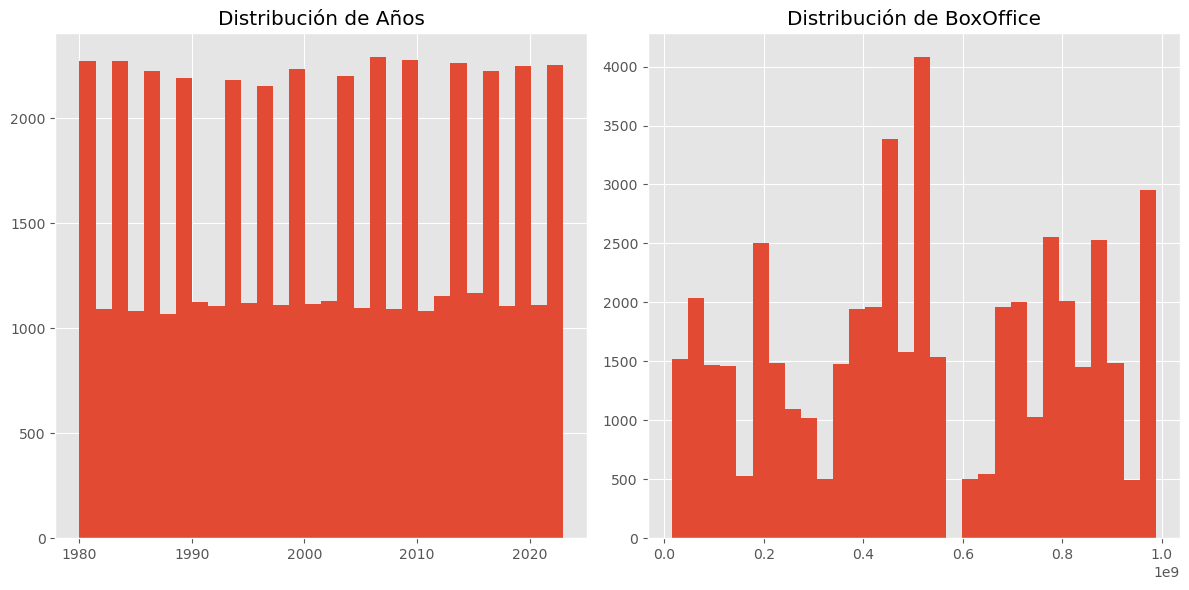

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(filtered_data['Year'], bins=30)
plt.title('Distribución de Años')

plt.subplot(1, 2, 2)
plt.hist(filtered_data['BoxOffice_USD'], bins=30)
plt.title('Distribución de BoxOffice')
plt.tight_layout()
plt.show()

In [30]:
# Si aún no hay datos, usamos TODOS los datos limpios (sin filtrar)
if len(filtered_data) == 0:
    print("\nUsando todos los datos disponibles (sin filtrado adicional)")
    filtered_data = clean_data.copy()

# Transformación logarítmica recomendada
filtered_data['log_BoxOffice'] = np.log1p(filtered_data['BoxOffice_USD'])
filtered_data['log_Budget'] = np.log1p(filtered_data['Budget_USD'])

# Selección de características
X = filtered_data[['Year', 'log_Budget']]  # Ajustar según necesidades
y = filtered_data['log_BoxOffice']

print("\nPreparación final completada. Datos listos para el modelo.")
print(f"Muestras disponibles: {len(X)}")
print(f"Características: {X.columns.tolist()}")


Preparación final completada. Datos listos para el modelo.
Muestras disponibles: 49075
Características: ['Year', 'log_Budget']


C:\Users\ESTUDIANTE\AppData\Local\Temp\ipykernel_1308\4241000743.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['log_BoxOffice'] = np.log1p(filtered_data['BoxOffice_USD'])
C:\Users\ESTUDIANTE\AppData\Local\Temp\ipykernel_1308\4241000743.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['log_Budget'] = np.log1p(filtered_data['Budget_USD'])


In [31]:
# Verificar si BoxOffice está en millones
if data['BoxOffice_USD'].max() > 1e8:  # Si hay valores > 100,000,000
    print("Parece que BoxOffice está en dólares, no en millones")

Parece que BoxOffice está en dólares, no en millones


In [33]:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Lectura de datos

In [ ]:
# Visualización del conjunto de datos
#este código es de chat gpt

In [ ]:
# Modificación del conjutno de datos

In [ ]:
#Construcción del modelo de regresión lineal

In [ ]:
# Predicción de nuevos ejemplos